## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

Questions Chosen: Q0 and Q1

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. 
Regression- residual and errors, minimizing squared error
Classification- predicting categories 
K-nearest neighbor (Regression)
- Compute distance from x to each observation in training data
- Find k nearest neighbors (minimize distance to x-hat), with outcomes y1, y2, …, yk
- Compute average nearest neighbor outcome at prediction for the new case x-hat
kNN (Classification)
- Compute distance from x-hat to each observation xi
- Find k nearest neighbors
- Compute either the modal case (which neighbor type was most likely) or a probability of each class occurring proportional to the frequency in the neighbors

2. 
Confusion table: A cross-tabulation of predicted and actual values
It is a quantity of interest for classification and is important for determining if the model has done well or poorly.
- displays true negatives, true positives, false positives, and false negatives
- different metric than the one used for regression

3. 
SSE- quantifies the distance between predicted vs. actual values (error) and squares these values. A small SSE is ideal, but if it is too small then that means the model is over fit.
squared norm of distance between y and y-hat
SSE is important for helping us decide which k to use.

4. 
Overfitting- model works too well on the seen data/data it has been giving (training data), but will most likely not work well on test or unseen data ; k focuses on a feature of the data that will not appear in new data; the model is too complex, which leads to high variance 
Underfit- model does not work well on seen data, but will work really well for unseen data (does not get too specific in terms of identifying a slope or trend in the data set it has already seen); it cannot pick up underlying patterns or trends well; high bias

1. 
Splitting data into training and testing sets and evaluating SSE improves model performance because a balance can be found between overfit and underfit. In regression, you can use SSE vs. model complexity to decide which degree minimizes the SSE (look for where the point before test error increases). 
Splitting the data allows us to substitute uncertainty about future predictions for uncertainty about the hold-out data in order to test the model.

1. 
Class Label as a Prediction 
- assigns each input to the most likely class but does not offer info about model certainty or confidence; would pick the most likely even if it had low confidence; good because it is simple to interpret and not computationally taxing
Probability distribution Over Class Labels
- outputs a probability for each class; good because it gives info about confidence and is helpful for ranking predictions; requires more computation and may be difficult to interpret
- this is the one we were recommended to always use

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./USA_cars_datasets.csv')

In [5]:
print(df.columns.tolist())

['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition']


In [7]:
df.head()
remove_columns = ['Unnamed: 0', 'title_status', 'color', 'model', 'brand', 'vin', 'lot', 'state', 'country', 'condition']
df = df.drop(columns=remove_columns)

In [10]:
df.shape

(2499, 3)

In [11]:
df['price'].value_counts()

price
0        43
16500    26
13900    21
15500    19
15000    19
         ..
12560     1
11760     1
7340      1
6530      1
30100     1
Name: count, Length: 790, dtype: int64

In [12]:
df['mileage'].value_counts()

mileage
1        11
0         6
31727     2
33808     2
21774     2
         ..
90685     1
54141     1
82240     1
66167     1
31371     1
Name: count, Length: 2439, dtype: int64

In [13]:
df['year'].value_counts()

year
2019    892
2018    395
2017    377
2016    203
2015    196
2014    104
2013     86
2012     72
2020     48
2011     23
2008     18
2010     13
2009     11
2003      9
2006      8
2004      6
2007      6
2005      6
2001      5
1998      4
2000      4
2002      2
1994      2
1997      2
1996      2
1973      1
1999      1
1984      1
1995      1
1993      1
Name: count, dtype: int64

In [9]:
df.head(30)


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654
5,5700,2018,45561
6,7300,2010,149050
7,13350,2017,23525
8,14600,2018,9371
9,5250,2017,63418


In [21]:
na_counts = df.isna().sum()
print("Missing values:\n", na_counts)

Missing values:
 price      0
year       0
mileage    0
dtype: int64


I am not seeing any NAs to handle with head, shape, and value_counts(), and the na_counts confirms that.

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# pply Min-Max scaling- putting values to between zero and 1
df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])

df.head()


,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


In [23]:
from sklearn.model_selection import train_test_split
#Splitting Sample Up for Testing and Training Data
X = df[['year', 'mileage']]
y = df['price']

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

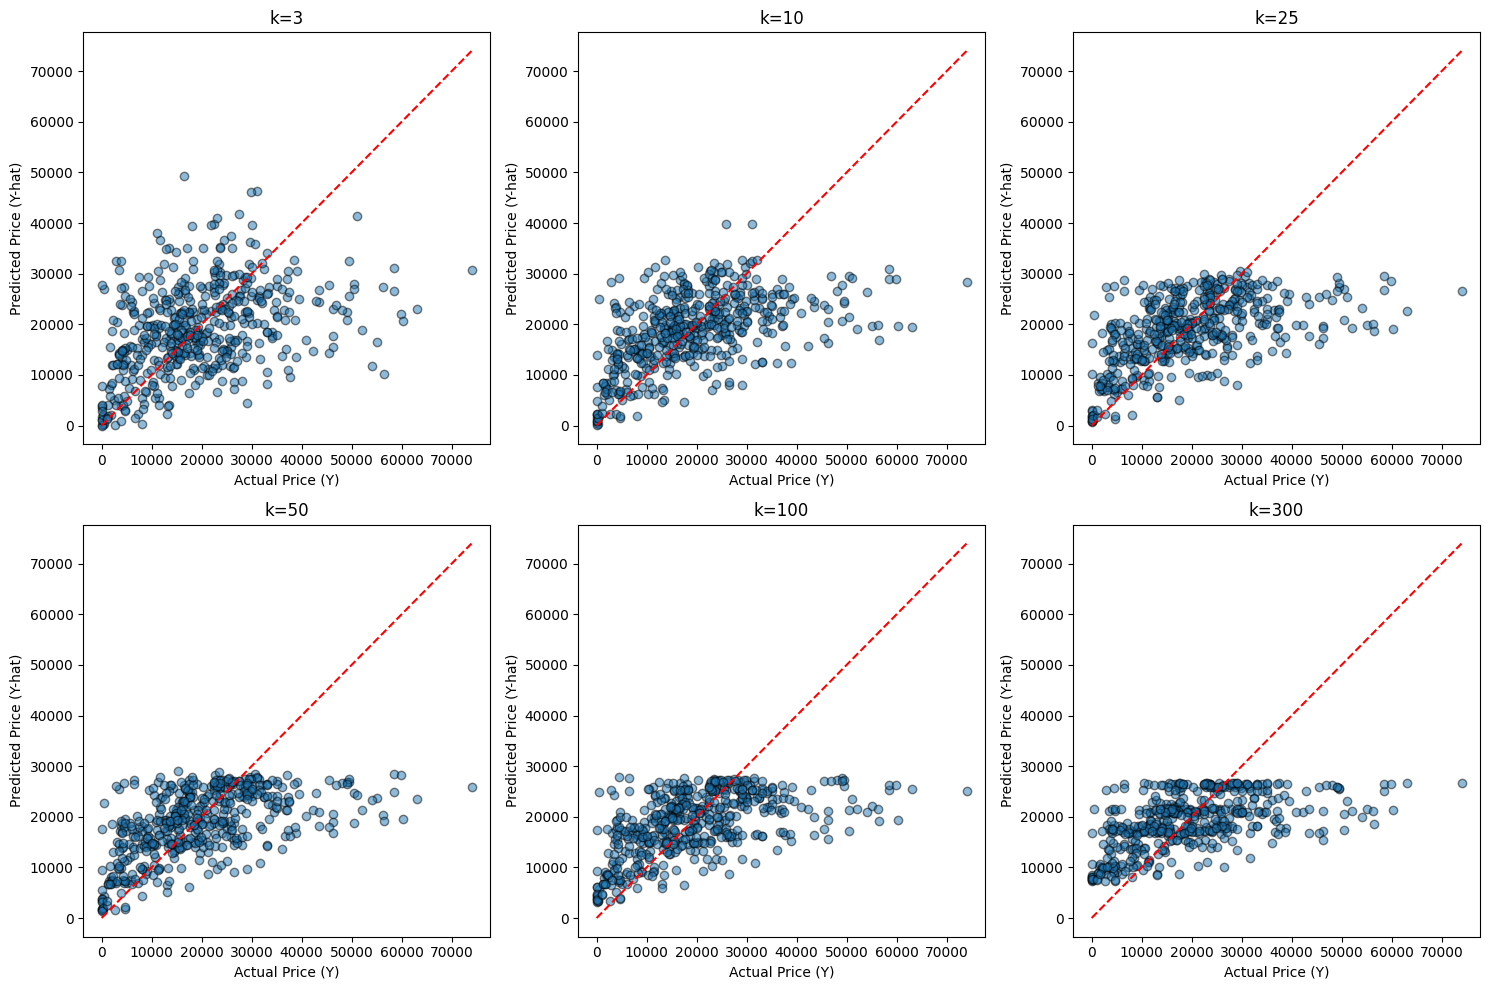

k=3, Mean Squared Error: 148104157.19
k=10, Mean Squared Error: 117399126.11
k=25, Mean Squared Error: 112600455.16
k=50, Mean Squared Error: 110202287.21
k=100, Mean Squared Error: 112250845.49
k=300, Mean Squared Error: 114497778.22


In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#K values 
k = [3, 10, 25, 50, 100, 300]
#Dictionary for mean squared error
mse_results = {}

#Plotting Results
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
    #Train kNN model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    #Predict on test set
    y_pred = knn.predict(X_test)

    #MSE calculations
    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse

    #Y vs. Y-hat (Actual price vs. Predicted price)
    plt.subplot(2, 3, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
    #y = x line (identity line)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Price (Y)')
    plt.ylabel('Predicted Price (Y-hat)')
    plt.title(f'k={k}')

#improves plotting
plt.tight_layout()
plt.show()

#Printing out MSE values- how best k will be chosen
for k, mse in mse_results.items():
    print(f'k={k}, Mean Squared Error: {mse:.2f}')



    


Optimal K= 50; This is the smallest Mean Squared Error. Minimizing the squared error is how we should pick k, as indicated in question 0.

When k =3, the model was extremely variant because it was over fit to the training data, but when k was 300, the model was very under fit (almost looked like a horizontal line on the graph because it was bias and clustered near the most prominent trend). K=300 exhibits high bias of an underfit model while k = 3 exhibits high variance of an over fit model.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data. 

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data. 
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE. 
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.